In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import random
import numpy as np
from numpy import *
import math

# Features For Clustering:
* First, We will begin by identifying the features our platform will generate
* Then, we will move foward on forming the basis of our model on 3 clusters, based on relational assumptions between our featrues (these assumptions will definetly change over the development of the model, however provide a basis for us to learn how our algorithm would handle data from the platform)

#### Features will be based off of data collected from the website and are comprised of:
* Engagement (X-Axis): Whether a lecture was watched, whether or not the student upvotes other's questions, office hour participation, discussion attendance (bc discussions are much more important now)
* Knowledge relevance (Y-Axis): Were the questions asked by the student relevant to the class? Were they upvoted by other students? Were similar questions asked? 
* Comprehension (Z-Axis): Quiz scores 

# Data Generation Class:
#### Serves to generate data in a way were we can easily manipulate parameters to gain insight into how our model will react to different combinations of clusters/learning styles

In [95]:
class DataGeneration:
    def __init__(self, week, cluster, num_datapoints):
        self.week = week
        self.cluster = cluster
        self.num_datapoints = num_datapoints
        
        self.variables = dict()
        ## __init__ parameters are strings

        #x1c1,y1c1,z1c1: 
            #x1 = x for for current week
            # c1 = Cluster One for current week
            #### x1c1 = X-Axis first cluster group for week 1
            #### y1c2 = Y-Axist 2nd cluster group for week one
    def get_variables(self):
        return self.variables

        
            
    def generate_x(self, dist_min, dist_max):
        self.variables["x" + self.week + "c" + self.cluster] = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)]
            ####IE: {"x1c1": [.5,.6,.......,.7]}
            
        
        return self.variables["x" + self.week + "c" + self.cluster]
    
    
    def generate_y(self, dist_min, dist_max):
        self.variables["y" + self.week + "c" + self.cluster] = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)]
            ####IE: {"x1c1": [.5,.6,.......,.7]}
            
        
        return self.variables["y" + self.week + "c" + self.cluster]
    
    
    def generate_z(self, dist_min, dist_max):
        self.variables["z" + self.week + "c" + self.cluster] = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)]
            ####IE: {"x1c1": [.5,.6,.......,.7]}
            
        
        return self.variables["z" + self.week + "c" + self.cluster]
    



            

## Week One Clustering Visualization 
#### *** Note that for simplicity in this example we will be clustering 3 seperate groups, where each grouping emphasizes the grouping ability of each feature ***

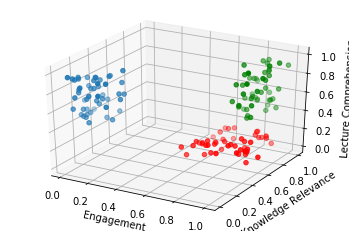

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
        
#Cluster 1: Emphasis on Z-Axis (Comprehension)
engagement1c1 = DataGeneration("1","1",50).generate_x(0,.3)
relevance1c1 = DataGeneration("1","1",50).generate_y(0,.3)
comprehension1c1 = DataGeneration("1","1",50).generate_z(.5,1)


#Cluster 2: Emphasis on Y-Axis (Knowledge Relevance)
engagement1c2 = DataGeneration("1","1",50).generate_x(.5,1)
relevance1c2 = DataGeneration("1","1",50).generate_y(.5,1)
comprehension1c2 = DataGeneration("1","1",50).generate_z(0,.2)

    
#Cluster 3: Emphasis on X-Axis (Engagement)
engagement1c3 = DataGeneration("1","1",50).generate_x(.8,1)
relevance1c3 = DataGeneration("1","1",50).generate_y(.5,1)
comprehension1c3 = DataGeneration("1","1",50).generate_z(.5,1)




## Group 1: Students who do well on quizes (Comprehention is high), 
# ask highly upvoted questions/ask questions similar to others, but dont engage (read spec)
ax.scatter(engagement1c1, relevance1c1, comprehension1c1 , marker='o')

## Group 2: Student who do worse on quizes, don't engage, and don't ask relevant questions
ax.scatter(engagement1c2, relevance1c2, comprehension1c2,  color = "r", marker='o')

## Group 3: High Knowledge relevance (asked questions similar to others/highupvote ratio in respect to class), low
 # engagement and lecture comprehension
ax.scatter(engagement1c3, relevance1c3, comprehension1c3, color = "g", marker='o')


ax.set_xlabel('Engagement')
ax.set_ylabel('Knowledge Relevance')
ax.set_zlabel('Lecture Comprehension')


plt.show()

## Week Two Clustering Visualization 

** Adding another weeks worth of student data, based off of the assumption that cluster distributions won't change**

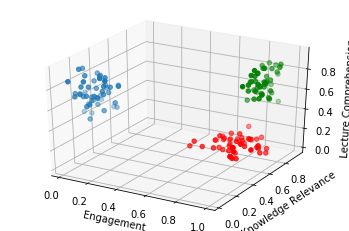

In [98]:
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
        
#Cluster 1: Emphasis on Z-Axis (Comprehension)
engagement2c1 = np.add(DataGeneration("1","1",50).generate_x(0,.3), engagement1c1)/2
relevance2c1 = np.add(DataGeneration("1","1",50).generate_y(0,.3),relevance1c1)/2
comprehension2c1 = np.add(DataGeneration("1","1",50).generate_z(.5,1), comprehension1c1)/2


#Cluster 2: Emphasis on Y-Axis (Knowledge Relevance)
engagement2c2 = np.add(DataGeneration("1","1",50).generate_x(.5,1), engagement1c2)/2
relevance2c2 = np.add(DataGeneration("1","1",50).generate_y(.5,1), relevance1c2)/2
comprehension2c2 = np.add(DataGeneration("1","1",50).generate_z(0,.2),comprehension1c2)/2

    
#Cluster 3: Emphasis on X-Axis (Engagement)
engagement2c3 = np.add(DataGeneration("1","1",50).generate_x(.8,1), engagement1c3)/2
relevance2c3 = np.add(DataGeneration("1","1",50).generate_y(.5,1),relevance1c3)/2
comprehension2c3 = np.add(DataGeneration("1","1",50).generate_z(.5,1), comprehension1c3)/2



## Group 1: Students who do well on quizes (Comprehention is high), 
# ask highly upvoted questions/ask questions similar to others, but dont engage (read spec)
ax2.scatter(engagement2c1, relevance2c1, comprehension2c1 , marker='o')

## Group 2: Student who do worse on quizes, don't engage, and don't ask relevant questions
ax2.scatter(engagement2c2, relevance2c2, comprehension2c2,  color = "r", marker='o')

## Group 3: High Knowledge relevance (asked questions similar to others/highupvote ratio in respect to class), low
 # engagement and lecture comprehension
ax2.scatter(engagement2c3, relevance2c3, comprehension2c3, color = "g", marker='o')


ax2.set_xlabel('Engagement')
ax2.set_ylabel('Knowledge Relevance')
ax2.set_zlabel('Lecture Comprehension')


plt.show()

## Week Three Clustering Visualization 

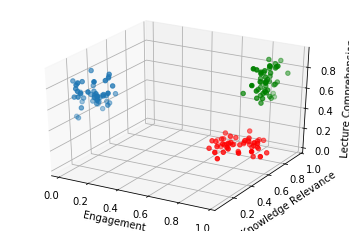

In [99]:
fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')
        
#Cluster 1: Emphasis on Z-Axis (Comprehension)
engagement3c1 = np.add(DataGeneration("1","1",50).generate_x(0,.3), engagement2c1)/2
relevance3c1 = np.add(DataGeneration("1","1",50).generate_y(0,.3),relevance2c1)/2
comprehension3c1 = np.add(DataGeneration("1","1",50).generate_z(.5,1), comprehension2c1)/2


#Cluster 2: Emphasis on Y-Axis (Knowledge Relevance)
engagement3c2 = np.add(DataGeneration("1","1",50).generate_x(.5,1), engagement2c2)/2
relevance3c2 = np.add(DataGeneration("1","1",50).generate_y(.5,1), relevance2c2)/2
comprehension3c2 = np.add(DataGeneration("1","1",50).generate_z(0,.2),comprehension2c2)/2

    
#Cluster 3: Emphasis on X-Axis (Engagement)
engagement3c3 = np.add(DataGeneration("1","1",50).generate_x(.8,1), engagement2c3)/2
relevance3c3 = np.add(DataGeneration("1","1",50).generate_y(.5,1),relevance2c3)/2
comprehension3c3 = np.add(DataGeneration("1","1",50).generate_z(.5,1), comprehension2c3)/2



## Group 1: Students who do well on quizes (Comprehention is high), 
# ask highly upvoted questions/ask questions similar to others, but dont engage (read spec)
ax3.scatter(engagement3c1, relevance3c1, comprehension3c1 , marker='o')

## Group 2: Student who do worse on quizes, don't engage, and don't ask relevant questions
ax3.scatter(engagement3c2, relevance3c2, comprehension3c2,  color = "r", marker='o')

## Group 3: High Knowledge relevance (asked questions similar to others/highupvote ratio in respect to class), low
 # engagement and lecture comprehension
ax3.scatter(engagement3c3, relevance3c3, comprehension3c3, color = "g", marker='o')


ax3.set_xlabel('Engagement')
ax3.set_ylabel('Knowledge Relevance')
ax3.set_zlabel('Lecture Comprehension')


plt.show()

# Running Clustering Alg
## Runs clustering algorithm on 3 weeks worth of data for 3 categories

AttributeError: type object 'DataGeneration' has no attribute 'get_variables'